# Lagrangian Optimization

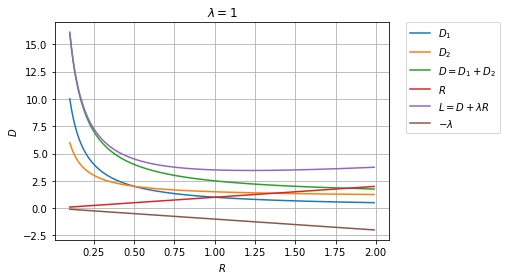

<IPython.core.display.Math object>

In [73]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math, Latex

# Data for plotting
R = np.arange(0.1, 2.0, 0.01)
D1 = 1/R
D2 = 0.5/R+1
D = D1+D2
_lambda = 1
L = D+_lambda*R

fig, ax = plt.subplots()
ax.plot(t, D1, label="$D_1$")
ax.plot(t, D2, label="$D_2$")
ax.plot(t, D, label="$D=D_1+D_2$")
ax.plot(t, R, label="$R$")
ax.plot(t, L, label="$L=D+\lambda R$")
ax.plot(t, -t, label="$-\lambda$")

ax.set(xlabel='$R$', ylabel='$D$', title='$\lambda={}$'.format(_lambda))
ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


#fig.savefig("test.png")
plt.show()
display(Math(r'\text{Minimum of}~L~\text{at}~R=' + str(np.argmin(L)*0.01)))